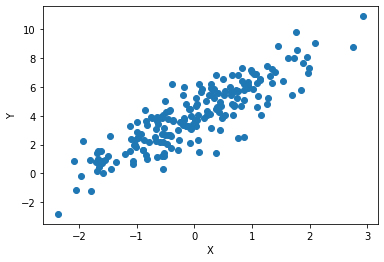

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random

a = 4 # height
b = 2 # slope

# generate data
N = 200 # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W

# plot data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Let us consider now the model given by $F(x,w_1,w_2) = w_1 + w_2 x$, which has two parameters $w_1$ and $w_2$. We want to adjust the values of $w_1$ and $w_2$ so that $F$ is a good approximation of the 'data' $Y$ plotted above. For this purpose, let's do the following:

**a**. Write a python function that takes as arguments $X$ and $Y$, and returns the mean square error of $F$ given by
$$ E(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N ( w_1 + w_2 x_i - y_i )^2,$$
where $x_i$ and $y_i$ are the i-th element of the arrays $X$ and $Y$, respectively.

**b**. Calculate the gradient of $E(w_1,w_2)$ analytically. Then, implement a function that calculates the gradient in Python. 

**c**. Using the function of the previous item, implement a gradient descent algorithm that can estimate good values of $w_1$ and $w_2$. Show that it works, i.e. that the final values of $w_1$ and $w_2$ are similar to the ones of $a$ and $b$ used above to generate the data.

**d**. Make a plot including a scatter plot of the data $Y$ (i.e. same as above), a linear function using the initial values of $w_1$ and $w_2$, a linear function using it final values, and a linear function using the values of $a$ and $b$. Make sure to add plot labels for the linear functions so we know which is which! 

**e**. Write another python function for the following error function:*
$$ \tilde{E}(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N ( w_1 + w_2 x_i - y_i )^4.$$
*Calculate analytically the gradient of $\tilde{E}$, and implement another python function that calculates it. 

### a. Write a python function that takes as arguments  𝑋  and  𝑌 , and returns the mean square error of  𝐹  given by 𝐸(𝑤1,𝑤2)=1𝑁∑𝑖=1𝑁(𝑤1+𝑤2𝑥𝑖−𝑦𝑖)2,

In [2]:
#A function that calculates the mean squared error for given values of X and Y with parameters w1 and w2
def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0
    
    #running the loop for total numer of samples in dataset
    for i in range(n):
        #calculating the error value as given in the above formula in statement (a)
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2
    
    #Since this is a mean error, dividing the total error calculated by total number of samples 
    mse = total_error / n
    return mse

### b. Calculate the gradient of  𝐸(𝑤1,𝑤2)  analytically. Then, implement a function that calculates the gradient in Python.

(b)For this part we need to calculate partial derivatives with respect to w1 and w2


Let's see how can we calculate the partial derivative for w1 first 

In the original equation we have = (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖)^2

(1)()^2 will transform to 2()

(2)(𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖) stays the same

(1 + (0) − 0)

(3)Here derivative of (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖) turns into this: (1 + (0) − 0) or 1 because we treat 𝑦𝑖 and (𝑤2 * 𝑥𝑖) as constants so they become 0 and w1 becomes 1, so we can just use the same equation that was left with us.

(4)Put everything together we get (2 * (w1 + (𝑤2 * 𝑥𝑖) - 𝑦𝑖))

Now let's see how can we calculate the partial derivative for w2 

In the original equation we have = (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖)^2

(1)()^2 will transform to 2()

(2)Take a partial derivative with respect to w2 we get (0 + (1 * 𝑥𝑖) − 0) hence we get 𝑥𝑖. 

(3)Put everything together we get (2 * (w1 + (𝑤2 * 𝑥𝑖) - 𝑦𝑖)) * 𝑥𝑖

In [3]:
#A function that calculates the Gradient/partial derivative of MSE
#We use partial derivatives to find how each individual parameter (w1 and w2) affects MSE and to update the values of w1 and w2
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0
    
    #calculate the mse partial derivatives of w1 and w2 for number of samples in the dataset as we calculated them above
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]
    
    #take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n
    
    return partial_derivative_w1 , partial_derivative_w2 

### c. Using the function of the previous item, implement a gradient descent algorithm that can estimate good values of  𝑤1  and  𝑤2 . Show that it works, i.e. that the final values of  𝑤1  and  𝑤2  are similar to the ones of  𝑎  and  𝑏  used above to generate the data.

In [4]:
#This function implements the gradient descent algorithm
def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):
    
    mse_list = []
    
    for i in range(num_iterations):
        #We use our gradient_mean_square_error to calculate partial derivatives of w1 and w2 and update them 
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2
        
        mse_list.append(mean_square_error(X, Y, w1, w2))
    #return the final calculated derivatives
    return w1, w2 ,mse_list

In [5]:
#Generate random value for w1 and w2 between 0 and 1
initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

#define the learning rate and no of iterations we need to calculate 
learning_rate = 0.1
iterations = 1000

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2,mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

#Print the original and new calculated values of a and b
print("Original value a = ", a , " New calculated value w1 = ",final_w1)
print("Original value a = ", b , " New calculated value w1 = ",final_w2)

Original value a =  4  New calculated value w1 =  4.034487392219161
Original value a =  2  New calculated value w1 =  1.9630254491390582


In [6]:
# #plot mse with respect to iterations
# iters = list(range(0, iterations))
# plt.figure(figsize=(10, 10))

# # plot mse
# plt.plot(iters, mse_final_list, color='b' ,label = "loss function")

### Make a plot including a scatter plot of the data  𝑌  (i.e. same as above), a linear function using the initial values of  𝑤1  and  𝑤2 , a linear function using it final values, and a linear function using the values of  𝑎  and  𝑏 . Make sure to add plot labels for the linear functions so we know which is which!

In [7]:
def predict(Y,X,w1,w2): 
    Y_pred = [] 
    for x in X: 
        val = w2*x + w1
        Y_pred.append(val)
    return Y_pred

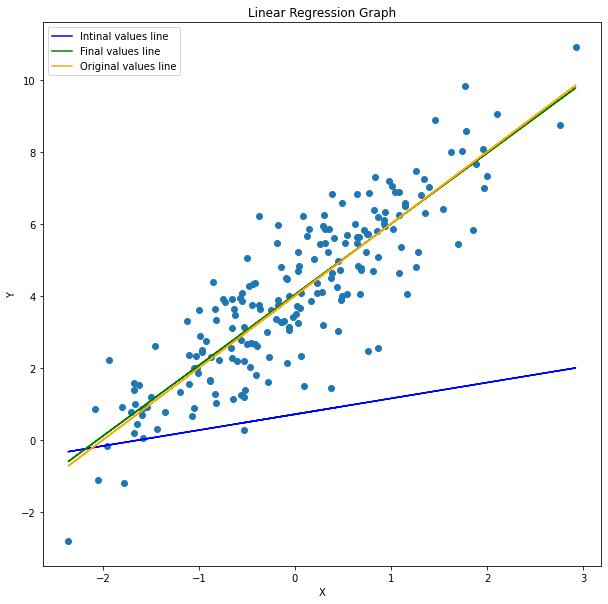

In [8]:
plt.figure(figsize=(10, 10))

# plot data as given above
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y,X,initial_w1,initial_w2)
# plot line graph using intital values of w1 and w2
plt.plot(X, get_preds, color='b' ,label = "Intinal values line")

get_preds = predict(Y,X,final_w1,final_w2)
# plot line graph using final values of w1 and w2
plt.plot(X, get_preds, color='g', label = "Final values line")

get_preds = predict(Y,X,a,b)
# plot line graph using final values of a and b
plt.plot(X, get_preds, color='orange', label = "Original values line")

#Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()

### e. Write another python function for the following error function: *𝐸̃ (𝑤1,𝑤2)=1𝑁∑𝑖=1𝑁(𝑤1+𝑤2𝑥𝑖−𝑦𝑖)4. *Calculate analytically the gradient of  𝐸̃  , and implement another python function that calculates it.

In [9]:
#A function that calculates the mean squared error power four for given values of X and Y with parameters w1 and w2
def mean_square_error_power_four(X, Y, w1, w2):
    n = len(X)
    total_error = 0
    
    #running the loop for total numer of samples in dataset
    for i in range(n):
        #calculating the error value as given in the above formula in statement (e)
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 4
    
    #Since this is a mean error, dividing the total error calculated by total number of samples 
    msepf = total_error / n
    return msepf

(e)For this part we need to calculate partial derivatives with respect to w1 and w2


Let's see how can we calculate the partial derivative for w1 first 

In the original equation we have = (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖)^4

(1)()^2 will transform to 4()

(2)(𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖) stays the same but we need to minus 1 from the power four and it'll become power 3

(1 + (0) − 0)^3

(3)Here derivative of (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖) turns into this: (1 + (0) − 0) or 1 because we treat 𝑦𝑖 and (𝑤2 * 𝑥𝑖) as constants so they become 0 and w1 becomes 1, so we can just use the same equation that was left with us.

(4)Put everything together we get (4 * (w1 + (𝑤2 * 𝑥𝑖) - 𝑦𝑖)^3)

Now let's see how can we calculate the partial derivative for w2 

In the original equation we have = (𝑤1 + (𝑤2 * 𝑥𝑖) − 𝑦𝑖)^4

(1)()^4 will transform to 4()

(2)Take a partial derivative with respect to w2 we get (0 + (1 * 𝑥𝑖) − 0) hence we get 𝑥𝑖. 

(3)Put everything together we get (4 * (w1 + (𝑤2 * 𝑥𝑖) - 𝑦𝑖)^3) * 𝑥𝑖

In [10]:
def gradient_mean_square_error_power_four(X, Y, w1, w2):
    
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0
    
    for i in range(n):
        partial_derivative_w1 += 4 * (w1 + w2 * X[i] - Y[i]) ** 3
        partial_derivative_w2 += 4 * (w1 + w2 * X[i] - Y[i]) ** 3 * X[i]
    
    #take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n
    
    return partial_derivative_w1 , partial_derivative_w2 